In [1]:
import tensorflow as tf
import numpy as np
import sys

from magenta.common import tf_lib

In [2]:
from magenta.models.rl_tuner import rl_tuner
from magenta.models.rl_tuner import rl_tuner_ops

In [3]:
rl_tuner_hparams = tf_lib.HParams(random_action_probability=0.1,    
                               store_every_nth=1,
                               train_every_nth=5,
                               minibatch_size=32,
                               discount_rate=0.5,
                               max_experience=100000,
                               target_network_update_rate=0.01)

In [4]:
SAVE_PATH = "/home/andrew/Git/rl_comps/q/"

In [5]:
# Model parameter settings
ALGORITHM = 'q' # Q-Learning
REWARD_SCALER = 1.0 # The weight placed on music theory rewards, i.e. r_MT * reward_scalar
OUTPUT_EVERY_NTH = 50000 # The number of steps before the model evaluates itself and stores a checkpoint
NUM_NOTES_IN_COMPOSITION = 300
PRIME_WITH_MIDI = False

In [6]:
q_rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION)

Retrieving checkpoint of Note RNN from Magenta download server.
INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Q network cell: <tensorflow.python.ops.rnn_cell.MultiRNNCell object at 0x7f094b23e2d0>
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action portion of graph
Instructions for updating:


In [7]:
q_rl_net.restore_from_directory(directory=SAVE_PATH, checkpoint_name="AR_model_20170124-950000")

Attempting to restore from checkpoint /home/andrew/Git/rl_comps/q/AR_model_20170124-950000
INFO:tensorflow:Attempting to restore from checkpoint /home/andrew/Git/rl_comps/q/AR_model_20170124-950000


INFO:tensorflow:Priming with note 14
INFO:tensorflow:Generated sequence: [14, 1, 18, 0, 16, 0, 16, 21, 21, 0, 19, 0, 0, 22, 0, 14, 0, 0, 1, 19, 0, 26, 1, 23, 0, 1, 23, 25, 1, 26, 0, 1, 25, 26, 0, 21, 0, 1, 0, 23, 21, 0, 1, 18, 0, 0, 23, 0, 28, 26, 0, 0, 23, 0, 21, 16, 0, 18, 0, 14, 0, 0, 1, 14, 0, 18, 0, 21, 18, 0, 23, 19, 0, 0, 16, 0, 14, 0, 0, 13, 0, 23, 31, 0, 26, 0, 0, 1, 21, 1, 25, 28, 0, 1, 26, 30, 0, 26, 0, 0, 23, 0, 21, 0, 0, 23, 0, 13, 0, 0, 14, 0, 0, 1, 19, 0, 16, 0, 17, 0, 0, 1, 23, 25, 0, 0, 1, 23, 0, 1, 21, 0, 0, 1, 19, 0, 18, 21, 21, 20, 0, 21, 0, 0, 1, 14, 0, 18, 0, 21, 0, 0, 1, 14, 0, 17, 0, 21, 0, 0, 24, 0, 21, 0, 0, 16, 21, 26, 0, 18, 0, 14, 0, 0, 1, 18, 0, 11, 0, 17, 0, 0, 14, 0, 16, 0, 14, 0, 1, 26, 0, 0, 1, 21, 0, 18, 14, 0, 0, 16, 18, 21, 0, 0, 19, 0, 0, 16, 0, 21, 16, 16, 0, 14, 0, 13, 0, 14, 0, 0, 1, 16, 0, 18, 21, 0, 0, 1, 14, 0, 18, 0, 21, 0, 0, 1, 14, 0, 16, 0, 21, 0, 0, 1, 26, 25, 30, 0, 26, 0, 1, 0, 23, 0, 23, 1, 25, 30, 0, 1, 24, 0, 0, 1, 14, 21, 0, 0, 1, 

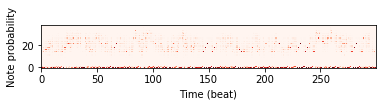

In [8]:
q_rl_net.generate_music_sequence(visualize_probs=True, title='my_q_rl')

In [9]:
# Compute statistics about how well the model adheres to the music theory rules.
q_stat_dict = q_rl_net.evaluate_music_theory_metrics(num_compositions=100)

INFO:tensorflow:Total compositions: 100.0
Total notes:30000.0
	Compositions starting with tonic: 2.0
	Compositions with unique highest note:51.0
	Compositions with unique lowest note:62.0
	Number of resolved leaps:785.0
	Number of double leaps:339.0
	Notes not in key:414.0
	Notes in motif:25385.0
	Notes in repeated motif:1501.0
	Notes excessively repeated:0.0

	Percent compositions starting with tonic:0.02
	Percent compositions with unique highest note:0.51
	Percent compositions with unique lowest note:0.62
	Percent of leaps resolved:0.698398576512
	Percent notes not in key:0.0138
	Percent notes in motif:0.846166666667
	Percent notes in repeated motif:0.0500333333333
	Percent notes excessively repeated:0.0

	Average autocorrelation of lag1:-0.222890636262
	Average autocorrelation of lag2:0.0409243993087
	Average autocorrelation of lag3:0.0558027830675

	Avg. num octave jumps per composition:0.22
	Avg. num sevenths per composition:0.41
	Avg. num fifths per composition:3.57
	Avg. num six